# Homework 2: Randomized Block and Latin Square Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 20, 2026**

**PART 1 INSTRUCTIONS:** You are an educational researcher interested in comparing different methods for teaching data science to undergraduate students. There are three different methods you are interested in comparing: (1) Direct Instruction (traditional method); (2) Inquiry-Based Learning (teacher facilitates student problem solving); (3) Collaborative Learning (students working in small groups). To compare these methods, you decide to randomly recruit undergraduate data science students to be part of a workshop on hypothesis testing basics. Students will be randomly assigned to one of three workshops, where each workshop employs a different teaching method. At the end of the workshop, students will be given a 50-question quiz where their understanding of hypothesis testing will be assessed. Percentage scores on this quiz serve as the outcome of interest.

However, it would be apparent that the prior level of knowledge a student possess about hypothesis testing may serve as a potential confounding variable that you would want to control for. Thus, the Prior Knowledge a given student has about hypothesis testing is categorized into "High" and "Low". The data from this experiment are contained in the `Data Science Teaching Method.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

- To objective of the experiment is to determine wheather different teaching methods produce varying degrees of student comprehension of hypothesis testing by using the percentage scores on a 59-question quiz and evaluate its effectiveness.

**Question 2.** Specify the outcome variable

- **Outcome/Dependent Variable** = Score (nominal categorical variable)

**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?

- **Independent Variable:** Teaching Method (nominal catagorical variable)
  
  **Blocking Factor:** Prior Knowledge (ordinal catagorical variable)

  **Lurking Variables:** There could be multiple different operators, such as a students math background, their interest in data science, the time of day, how the instructor teaches, among others.

**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

- It accounts for the known variability in 'Prior Knowledge' by grouping students into 'High' and 'Low' knowledge sets before assigning the teaching method, we ensure that a 'smart' group "doesn't accidentally end up all in one workshop, which would bias the results.

- It ignores the blocking factor that a randomized block design has. If we randomly assigned all students, we might end up with a 'Direct Instruction' group that can have 90% 'High Knowledge' students, all by by pure chance and inflate the scores.

**Question 5.** State the null and alternative hypotheses for this experiment.

- ($H_0$): $\mu_1 = \mu_2 = \mu_3$

- ($H_a$): At least one $\mu_i \neq \mu_j$



In [2]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "cmuriithi"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

✅ Already inside repo folder: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/cmuriithi/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments


**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

- The exploratory results support the alternative hypothesis ($H_a$) more strongly than the null hypothesis ($H_0$).

- Teaching Method shows substantial differences in mean scores (87.1 vs. 82.1 vs. 77.5), suggesting that the method used significantly impacts learning outcomes.

- The Prior Knowledge block also shows a performance gap (85.8 vs. 78.7), validating the choice of a randomized block design to control for this variability.

  Prior_Knowledge Teaching_Method  Score
0             Low          Direct  77.99
1             Low          Direct  76.89
2             Low          Direct  71.19
3             Low          Direct  81.23
4             Low          Direct  73.97
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Prior_Knowledge  60 non-null     object 
 1   Teaching_Method  60 non-null     object 
 2   Score            60 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.5+ KB
None

Summary Statistics:
                                 count    mean       std    min      25%  \
Teaching_Method Prior_Knowledge                                            
Collaborative   High              10.0  89.390  6.540866  78.79  86.2675   
                Low               10.0  84.810  7.850254  70.47  83.2075   
Direct          High              10.0  

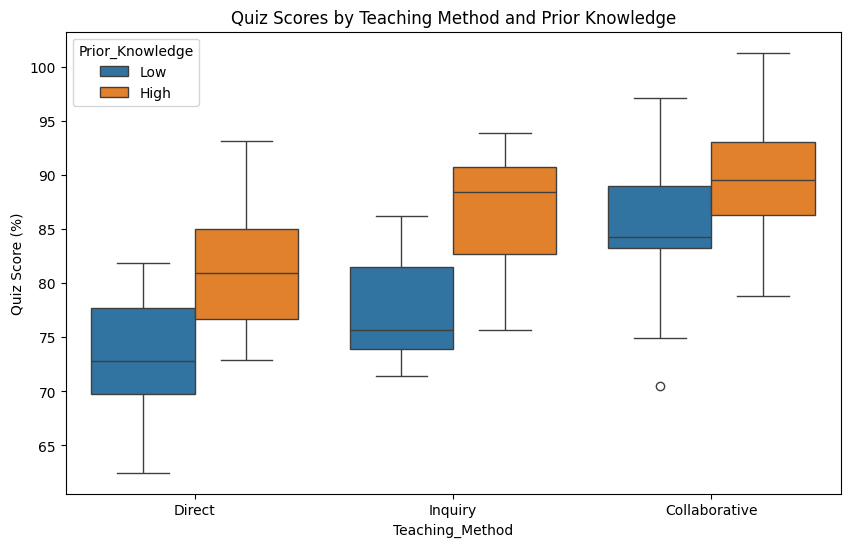

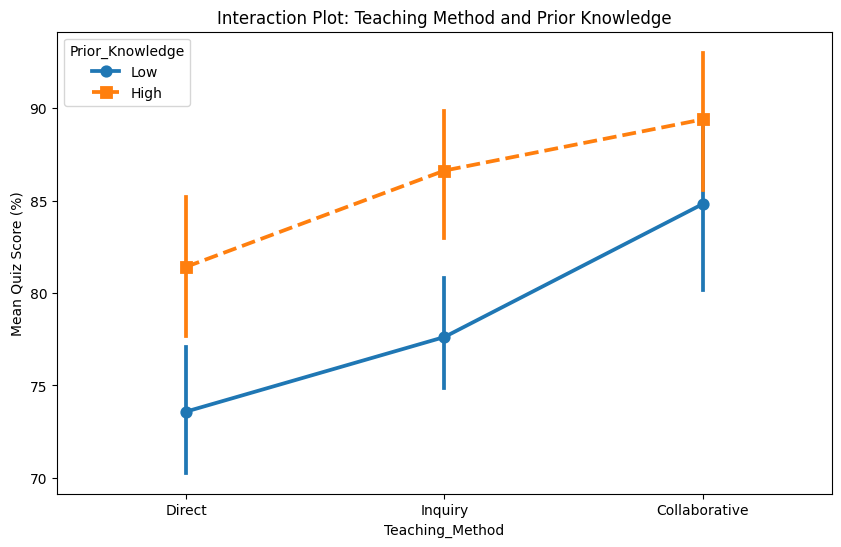

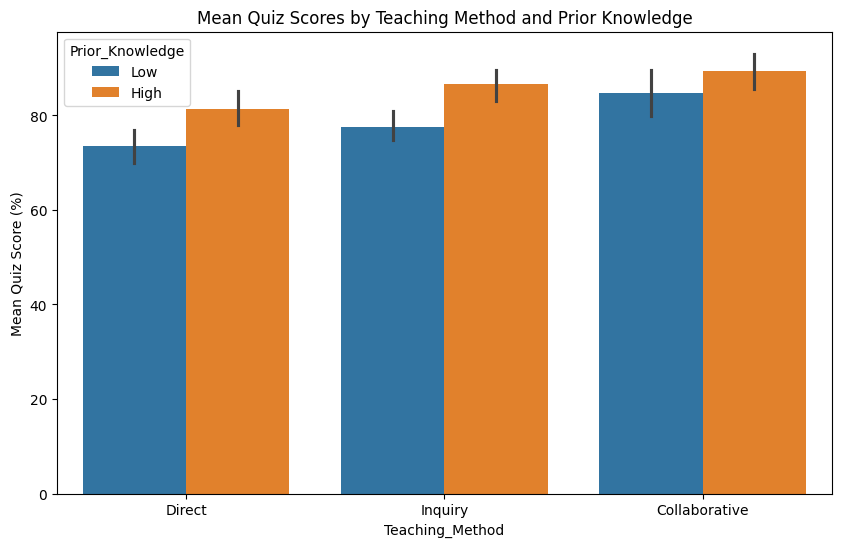

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset #
DST = pd.read_excel('HW2/Data Science Teaching Method.xlsx')

# Initial inspection #
print(DST.head())
print(DST.info())

# Summary statistics for the outcome variable (Score) grouped by Teaching Method and Prior Knowledge #
summary_stats = DST.groupby(['Teaching_Method', 'Prior_Knowledge'])['Score'].describe()
print("\nSummary Statistics:")
print(summary_stats)

# Overall summary by Teaching Method #
method_summary = DST.groupby('Teaching_Method')['Score'].describe()
print("\nSummary by Teaching Method:")
print(method_summary)

# Overall summary by Prior Knowledge #
knowledge_summary = DST.groupby('Prior_Knowledge')['Score'].describe()
print("\nSummary by Prior Knowledge:")
print(knowledge_summary)


# Boxplot of Scores by Teaching Method and Prior Knowledge #
plt.figure(figsize=(10, 6))
sns.boxplot(x='Teaching_Method', y='Score', hue='Prior_Knowledge', data=DST)
plt.title('Quiz Scores by Teaching Method and Prior Knowledge')
plt.ylabel('Quiz Score (%)')
plt.savefig('boxplot_scores.png')

# Interaction Plot #
plt.figure(figsize=(10, 6))
sns.pointplot(x='Teaching_Method', y='Score', hue='Prior_Knowledge', data=DST, markers=['o', 's'], linestyles=['-', '--'])
plt.title('Interaction Plot: Teaching Method and Prior Knowledge')
plt.ylabel('Mean Quiz Score (%)')
plt.savefig('interaction_plot.png')

# Bar plot of means #
plt.figure(figsize=(10, 6))
sns.barplot(x='Teaching_Method', y='Score', hue='Prior_Knowledge', data=DST)
plt.title('Mean Quiz Scores by Teaching Method and Prior Knowledge')
plt.ylabel('Mean Quiz Score (%)')
plt.savefig('barplot_means.png')



Question 7. Build a two-way ANOVA model. Test the assumption of normality using both a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

- The Shapiro-Wilk test yielded a p-value of 0.8794, which is significantly greater than the typical alpha level of 0.05. Therefore, we fail to reject the null hypothesis that the residuals are normally distributed.

- With the Q-Q plot, which shows a linear trend, we can confidently proceed with the ANOVA results as the normality assumption is satisfied and strongly support the assuption of normality.

Shapiro-Wilk p-value: 0.8794000184343089


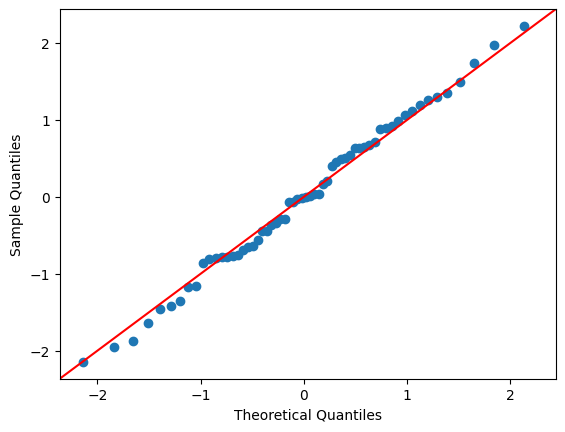

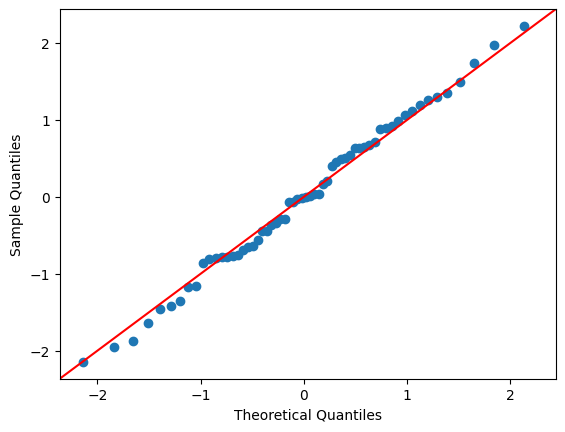

In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Build ANOVA model #
model = ols('Score ~ C(Teaching_Method) + C(Prior_Knowledge)', data=DST).fit()

# Get residuals #
residuals = model.resid

# Formal Normality Test #
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk p-value: {shapiro_p}")

# Visual Normality Test #
sm.qqplot(residuals, line='45', fit=True)

Question 8. Test the assumption of homogeneity of variance using both a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

- The Levene’s test yielded a p-value of 0.9689, which is well above the standard threshold of 0.05. Therefore, we fail to reject the null hypothesis of equal variances.

- The Residuals vs. Fitted plot confirms this by showing a consistent vertical spread across the different predicted mean scores to support the assumption of homogeneity of variance.

Levene's Test Result:
Statistic: 0.18017965221628604, p-value: 0.9689056443772588


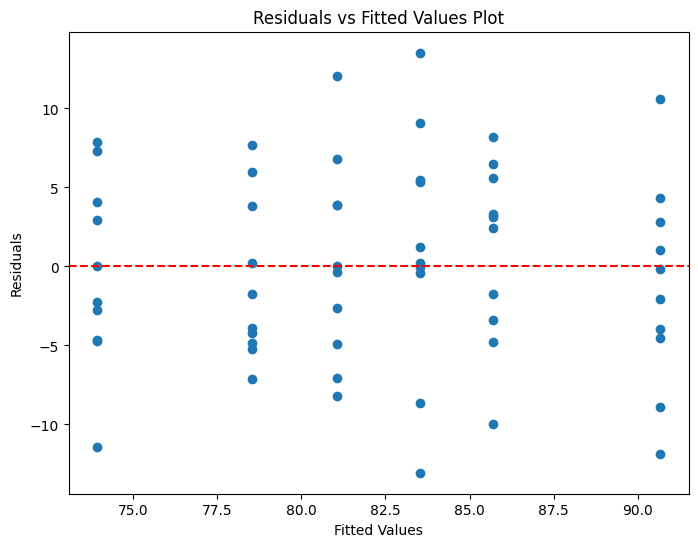

In [31]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


# Build the ANOVA model #
DST_model = ols('Score ~ C(Teaching_Method) + C(Prior_Knowledge)', data=DST).fit()

# Visual Method: Residuals vs Fitted Plot #
fitted_values = DST_model.fittedvalues
residuals = DST_model.resid

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values Plot')
plt.savefig('residuals_vs_fitted.png')

# Levene's Test #
groups = [group['Score'].values for name, group in DST.groupby(['Teaching_Method', 'Prior_Knowledge'])]
levene_test = stats.levene(*groups)

print("Levene's Test Result:")
print(f"Statistic: {levene_test.statistic}, p-value: {levene_test.pvalue}")

Question 9. Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

- F-statistic: 11.632

- p-value: <.001

- The p-value of 0.000060 is significantly lower than the standard significance level of $\alpha = 0.05$. This means there is less than a 0.01 probability that the observed differences in quiz scores between the teaching methods occurred by pure chance. The F-statistic of 11.632 indicates that the variation in scores between the teaching methods is over 11 times greater than the variation within the groups. This provides strong evidence that the choice of teaching method significantly impacts a student's understanding of hypothesis testing.

In [32]:
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                         sum_sq    df          F    PR(>F)
C(Teaching_Method)   923.670743   2.0  11.632036  0.000060
C(Prior_Knowledge)   764.836807   1.0  19.263595  0.000051
Residual            2223.409543  56.0        NaN       NaN


Question 10. If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

- The only approach that demonstrates a definite, statistically significant benefit under Tukey indicate that Collaborative-Direct is the most successful of the three approaches for teaching hypothesis testing at the typical alpha level of 0.05.

In [41]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD post-hoc test #
DST_tukey = pairwise_tukeyhsd(endog=DST['Score'], groups=DST['Teaching_Method'], alpha=0.05)

print(DST_tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
Collaborative  Direct  -9.6085 0.0003 -15.1184 -4.0986   True
Collaborative Inquiry  -4.9855 0.0838 -10.4954  0.5244  False
       Direct Inquiry    4.623 0.1168  -0.8869 10.1329  False
-------------------------------------------------------------


Question 11. Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations and future directions of this experiment.

- Active, social learning environments are supported by the findings. We were able to precisely isolate the 'Teaching Method' effect by using RBD to account for the students' prior knowledge. According to the statistics, inquiry-based learning is still a strong secondary challenger, but collaborative learning closes the gap the best. It is advised that future workshops move away from traditional Direct Instruction in order to optimize student performance in the foundations of data science.

PART 2 INSTRUCTIONS: Now suppose a university is evaluating the effectiveness of four different online learning platforms (say A, B, C, and D) on student engagement for students taking an undergraduate data science course in an online synchronous format. One section of the course is offered Monday through Thursday in the Morning, Early Afternoon, Mid-Afternoon, and Evening sections. Student engagement is measured through the total number of logins to the online learning platform for a given course section over the course of the semester. Below is a table describing the study design and factors:

Section \ Day	Monday	Tuesday	Wednesday	Thursday
Morning	A	B	C	D
Early Afternoon	B	C	D	A
Mid-Afternoon	C	D	A	B
Evening	D	A	B	C
Here, our main interest is in comparing engagement across the online learning platforms, but we also want to control for Day of the Week as well as Time of Day, as these could potentially be confounding variables. The data for this experiment are contained in the Online Learning and Engagement.xlsx file. With these data, your tasks are:

Question 1. Briefly define the objective of this experiment

- The objective is to separate the impact of the online learning platform on participation while making sure that the timing of the class doesn't affect the outcomes. In order to determine whether platform (A, B, C, or D) actually generates the most engagement, the Latin Square Design filters out environmental factors.

Question 2. Specify the outcome variable

- **Outcome/Dependent Variable** = Engagement (quantatative variable)


Question 3. Specify the independent variable and blocking factors. What are some other possible lurking variables?

- **Independent Variable:** Platform (nominal catagorical variable)

  **Blocking Factors:** Day (ordinal catagorical variable) and Section (nominal catagorical variable)

  **Lurking Variables:** There could be multiple different operators, such as a student dempgraphics, difficualty of content, the instructor, tecnical issues, among others.

Question 4. Briefly explain why a Latin Square Design would be appropriate here. Similarly, explain why a completely randomized design or randomized block design would not be appropriate.

- Latin Square Design (LSD) allows for the simultaneous control of two nuisance variables using a balanced grid. Each platform appears exactly once in each row and column, filtering out time-based noise efficiently with fewer required runs.
- CRD ignores both Day and Section, leaving things up to pure chance.
- RBD can only control for one nuisance factor. leaving leaking variation.

Question 5. State the null and alternative hypotheses for this experiment.

- ($H_0$): $\mu_A = \mu_B = \mu_C = \mu_D$

- ($H_a$): At least one $\mu_i \neq \mu_j$


Question 6. Perform appropriate exploratory analysis, including summary statistics and data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

- The support for alternative hypothesis ($H_a$) is stronger to defend. The boxplot shows that Platform A and possibly D has a significantly higher median number and uggests that the platform itself is a major driver of engagement.

--- Summary Statistics by Platform ---
          count       mean        std      min        25%       50%  \
Platform                                                              
A           4.0  1408.8475  19.319733  1393.29  1398.2025  1402.620   
B           4.0  1339.7200  39.845434  1290.89  1317.2975  1343.010   
C           4.0  1332.6425  32.288451  1297.85  1312.2425  1330.335   
D           4.0  1379.0225   7.354601  1370.68  1374.8200  1378.730   

                75%      max  
Platform                      
A         1413.2650  1436.86  
B         1365.4325  1381.97  
C         1350.7350  1372.05  
D         1382.9325  1387.95  


/tmp/ipython-input-2415359141.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Platform', y='Engagement', data=OLE, order=['A', 'B', 'C', 'D'], palette='viridis')


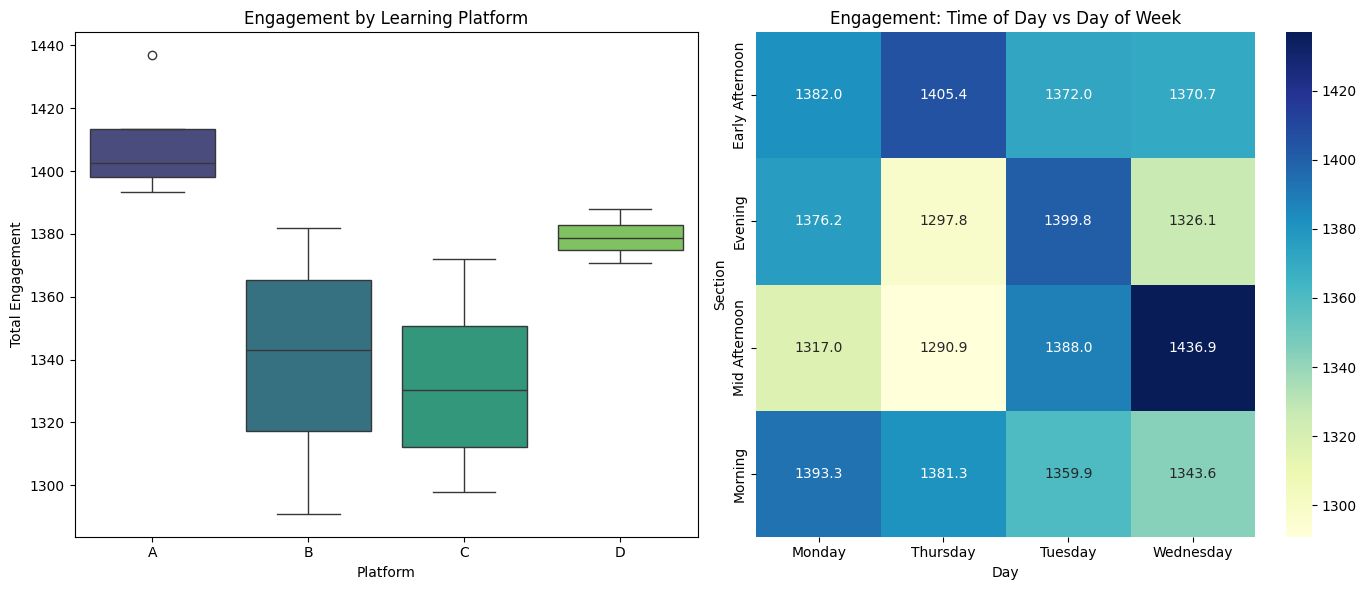

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load new data #
OLE = pd.read_excel('HW2/Online Learning and Engagement.xlsx')

# Summary Statistics #
OLE_summary = OLE.groupby('Platform')['Engagement'].describe()
print("--- Summary Statistics by Platform ---")
print(OLE_summary)

# Plot size #
plt.figure(figsize=(14, 6))

# Boxplot of Engagement by Platform #
plt.subplot(1, 2, 1)
sns.boxplot(x='Platform', y='Engagement', data=OLE, order=['A', 'B', 'C', 'D'], palette='viridis')
plt.title('Engagement by Learning Platform')
plt.ylabel('Total Engagement')

# Heatmap of Latin Square blocking (Time vs Day) #
plt.subplot(1, 2, 2)
pivot_table = OLE.pivot(index='Section', columns='Day', values='Engagement')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Engagement: Time of Day vs Day of Week')

plt.tight_layout()
plt.show()

Question 7. Build a three-way ANOVA model. Test the assumption of normality using both a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

- The results of both the visual and testing methods strongly support the assumption of normality.
- The Shapiro-Wilk test p-value of 0.8797 is well above the common alpha level of 0.05, meaning we fail to reject the null hypothesis of normality.
- The Q-Q plot confirms this result visually, as the residuals align well with the theoretical normal distribution.

Shapiro-Wilk Test for Normality (p-value): 0.8796977463074305


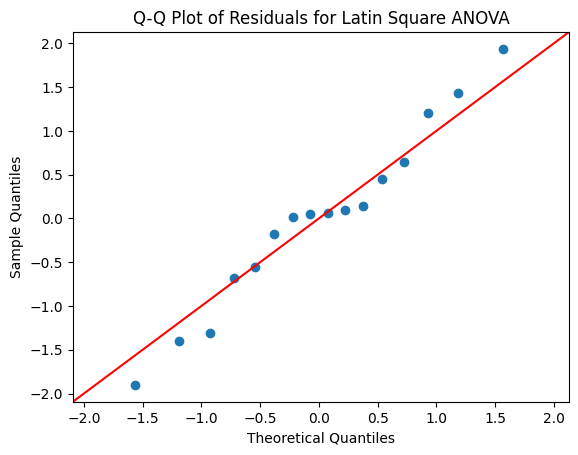

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt

# Build three-way ANOVA model #
model_latin_square = ols('Engagement ~ C(Platform) + C(Day) + C(Section)', data=OLE).fit()
print(model_latin_square)

# Residuals #
residuals_latin_square = model_latin_square.resid

# Shapiro-Wilk #
shapiro_stat_ls, shapiro_p_ls = stats.shapiro(residuals_latin_square)
print(f"Shapiro-Wilk Test for Normality (p-value): {shapiro_p_ls}")

# Q-Q Plot #
fig = sm.qqplot(residuals_latin_square, line='45', fit=True)
plt.title('Q-Q Plot of Residuals for Latin Square ANOVA')
plt.show()

Question 8. Test the assumption of homogeneity of variance using both a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

- Results support the assumption of homogeneity of variance, though the evidence is less overwhelming than in the first experiment.
- The Levene’s test p-value 0.0748 is greater than the standard significance level of 0.05. We will fail to reject the null hypothesis of equal variances.
- The Residuals vs. Fitted plot does not show evidence of severe heteroscedasticity. With a sample size of 16, something obvious would have to shape in order to violate the assumption of homogeneity.

Levene's Test Result (by Platform):
Statistic: 2.9648, p-value: 0.0748


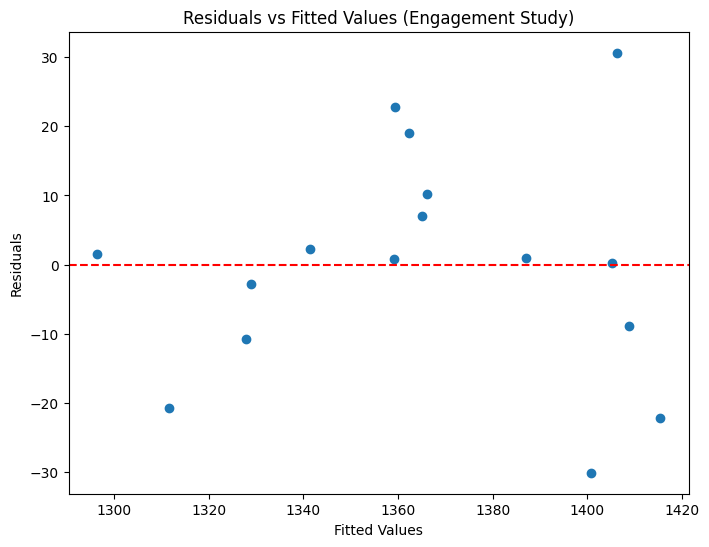

In [48]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt

# Build the ANOVA model #
OLE_model = ols('Engagement ~ C(Platform) + C(Day) + C(Section)', data=OLE).fit()

# Residuals vs Fitted Values Plot #
fitted_values = OLE_model.fittedvalues
residuals = OLE_model.resid

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Engagement Study)')
plt.savefig('engagement_homogeneity_plot.png')

# Levene's Test #
groups = [group['Engagement'].values for name, group in OLE.groupby('Platform')]
levene_test = stats.levene(*groups)

print("Levene's Test Result (by Platform):")
print(f"Statistic: {levene_test.statistic:.4f}, p-value: {levene_test.pvalue:.4f}")

Question 9. Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

- F-statistic: 7.608

- p-value: 0.018

- ($H_a$) is more strongly supported than the null hypothesis. The p-value of 0.018 is less than the common significance level of $\alpha = 0.05$. This indicates that the probability of observing such a large difference in engagement levels purely by chance is only about 1.8%. The volatility in engagement scores attributable to the various online platforms is more than seven times larger than the residuals, with an F-statistic of 7.61. This offers substantial proof that the particular platform utilized for the synchronous sessions affects student involvement in a quantifiable way.

In [51]:
anova_table_2 = sm.stats.anova_lm(OLE_model, typ=2)

print(anova_table_2)

                   sum_sq   df         F    PR(>F)
C(Platform)  15221.225819  3.0  7.607701  0.018122
C(Day)        2774.676069  3.0  1.386807  0.334557
C(Section)    2396.427869  3.0  1.197756  0.387569
Residual      4001.530887  6.0       NaN       NaN


Question 10. If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

- Platform A is the best learning platform for increasing student engagement online. The Tukey HSD test results with low p-values at  $\alpha = 0.05$   encourage greater student engagement in Platform A  as a priority for its online learning.

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Tukey's HSD post-hoc test #
tukey_engagement = pairwise_tukeyhsd(endog=OLE['Engagement'],
                                    groups=OLE['Platform'],
                                    alpha=0.05)

print(tukey_engagement)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B -69.1275 0.0186 -127.1688 -11.0862   True
     A      C  -76.205 0.0099 -134.2463 -18.1637   True
     A      D  -29.825 0.4534  -87.8663  28.2163  False
     B      C  -7.0775  0.983  -65.1188  50.9638  False
     B      D  39.3025 0.2375  -18.7388  97.3438  False
     C      D    46.38 0.1359  -11.6613 104.4213  False
-------------------------------------------------------


Question 11. Write a brief conclusion summarizing the results of your analyses, including potential limitations and future directions of this experiment

- The findings demonstrate a strong treatment effect, suggesting that student engagement is greatly impacted by the online learning platform selection. Platform A outperformed Platforms B and C in terms of engagement according to Tukey HSD tests, but its advantage over Platform D was not statistically significant at the 95% confidence level. Engagement was not significantly impacted by the time of day or the day of the week, indicating that platform features—rather than scheduling—are what motivate student interaction. Nevertheless, the study's small sample size would not be able to discover subtler changes, as these variables might not accurately reflect learning outcomes or engagement quality, and the Latin Square design presupposes that there are no interaction effects between Day, Time, and Platform.  Future research should include broader engagement metrics, examine long-term trends to rule out novelty effects, and collect student feedback to better understand which platform features enhance engagement.